<a href="https://colab.research.google.com/github/soumitro114/Primitive_root_calculator/blob/main/Primitive_root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
# This notebook demonstrates how to calculate the primitive roots of a given prime number.
# It includes helper functions for finding prime factors, checking primitive roots, and listing all primitive roots of the input prime number.



# **Imports and Helper Functions**
# Below are the helper functions used for calculations.


In [ ]:
# Import necessary libraries
from math import gcd
from functools import lru_cache
from sympy import isprime, factorint, totient, prime
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.express as px

In [ ]:
@lru_cache(None)
def prime_factors(n):
    """
    Find all prime factors of n using sympy's factorint for optimization.
    """
    return set(factorint(n).keys())

In [ ]:
def is_primitive_root(g, p, factors):
    """
    Check if g is a primitive root modulo p using prime factors of p-1.
    """
    for q in factors:
        if pow(g, (p - 1) // q, p) == 1:
            return False
    return True

In [ ]:
def find_primitive_roots(p, factors, total_roots):
    """
    Find all primitive roots modulo p (p should be a prime number).
    Return the list of roots.
    Optimized to terminate early.
    """
    primitive_roots = []
    start_time = time.time()


    for g in range(2,p):
        if time.time() - start_time > 60:  # Timeout
            raise TimeoutError("Prime too large: computation exceeded 60 seconds")

        if is_primitive_root(g, p, factors):
            primitive_roots.append(g)
            if len(primitive_roots) == total_roots:  # Stop when all roots are found
                break

    return primitive_roots

In [ ]:
def plot_primitive_roots(p, roots):
    """
    Plots the primitive roots of a given prime number.
    """
    plt.figure(figsize=(10, 6))
    x = range(1, len(roots) + 1)
    y = roots
    plt.bar(x, y, color='blue', alpha=0.7)
    plt.xlabel("Index of Primitive Root")
    plt.ylabel("Primitive Root Value")
    plt.title(f"Visualization of {len(roots)} Primitive Roots for Prime {p}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
def plot_primitive_roots_aggregated(p, roots):
    """
    Aggregates and plots the primitive roots of a given prime number.
    """
    bin_size = 100  # Number of roots per bin
    num_bins = len(roots) // bin_size + (1 if len(roots) % bin_size else 0)
    aggregated_data = [
        np.mean(roots[i * bin_size:(i + 1) * bin_size]) for i in range(num_bins)
    ]
    x = range(1, num_bins + 1)

    plt.figure(figsize=(10, 6))
    plt.bar(x, aggregated_data, color='green', alpha=0.7)
    plt.xlabel(f"Bin Index (Bin Size = {bin_size})")
    plt.ylabel("Average Primitive Root Value")
    plt.title(f"Aggregated Visualization of Primitive Roots for Prime {p}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
def plot_primitive_roots_sampled(p, roots, sample_size=500):
    """
    Samples and plots primitive roots for visualization.
    """
    if len(roots) > sample_size:
        sampled_roots = random.sample(roots, sample_size)
        sampled_roots.sort()
    else:
        sampled_roots = roots

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(sampled_roots) + 1), sampled_roots, color='orange', alpha=0.7)
    plt.xlabel("Index of Sampled Primitive Roots")
    plt.ylabel("Primitive Root Value")
    plt.title(f"Sampled Visualization of Primitive Roots for Prime {p} (Sample Size: {sample_size})")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
def plot_primitive_roots_line(p, roots):
    """
    Plots a line graph for primitive roots for large datasets.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(roots) + 1), roots, marker='o', linestyle='-', color='blue', alpha=0.6)
    plt.xlabel("Index of Primitive Root")
    plt.ylabel("Primitive Root Value")
    plt.title(f"Line Plot of Primitive Roots for Prime {p}")
    plt.grid()
    plt.show()

In [ ]:
def plot_primitive_roots_interactive(p, roots):
    """
    Interactive scatter plot for primitive roots using Plotly.
    """
    fig = px.scatter(x=range(1, len(roots) + 1), y=roots,
                     labels={'x': 'Index of Primitive Root', 'y': 'Primitive Root Value'},
                     title=f"Interactive Primitive Roots Visualization for Prime {p}")
    fig.show()

In [ ]:
def check_prime(num):
    """
    Check if the input number is prime.
    """
    return isprime(num)


# **Input Section**
# Enter a prime number to find its primitive roots.

Enter a number to check if it is prime, type 'benchmark' to run the benchmark, or 'exit' to quit:
Number of primitive roots for 1299709: 426816
Primitive roots of 1299709 (first 10 roots): [6, 10, 18, 19, 21, 22, 24, 30, 34, 35] ...
Do you want to display all the roots? (yes/y to display, no/n to skip):
Do you want to visualize the primitive roots? (yes/y to visualize, no/n to skip):
The number of roots is large. Choose visualization type:
1: Aggregated (bins)
2: Sampled (random subset)
3: Line Plot
4: Interactive Plot


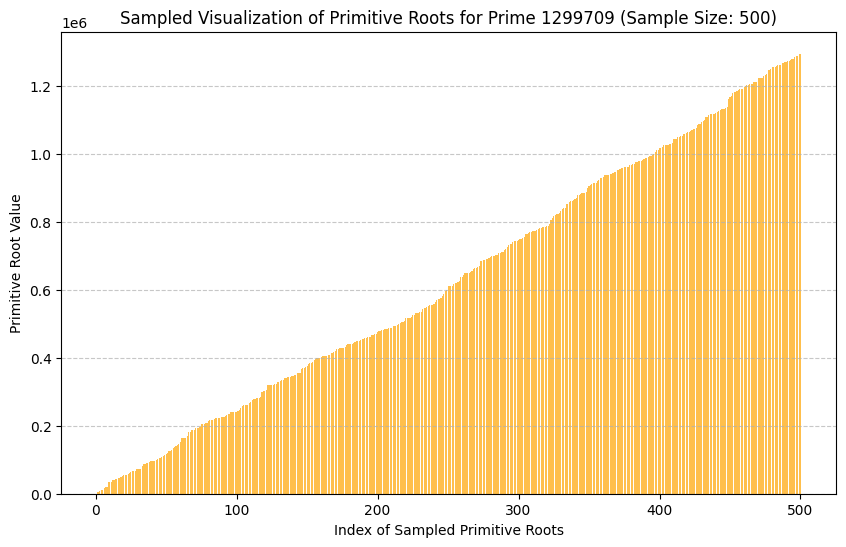

Time taken: 11.161319 seconds
Enter a number to check if it is prime, type 'benchmark' to run the benchmark, or 'exit' to quit:
Starting benchmarking...
Prime 2 (n=1): Time taken = 0.000004 seconds
Prime 48619 (n=5001): Time taken = 0.268810 seconds
Progress slow, increasing step size to 15000
Prime 224743 (n=20001): Time taken = 1.279886 seconds
Progress slow, increasing step size to 25000
Prime 545749 (n=45001): Time taken = 4.862761 seconds
Progress slow, increasing step size to 35000
Prime 1020389 (n=80001): Time taken = 4.627975 seconds
Progress slow, increasing step size to 45000
Prime 1655141 (n=125001): Time taken = 9.675632 seconds
Prime 2307233 (n=170001): Time taken = 10.146693 seconds
Progress slow, increasing step size to 55000
Prime 3122341 (n=225001): Time taken = 25.855204 seconds
Prime 3951169 (n=280001): Time taken = 26.980829 seconds
Progress slow, increasing step size to 65000
Prime 4946237 (n=345001): Time taken = 52.407813 seconds
Computation time exceeds 45 secon

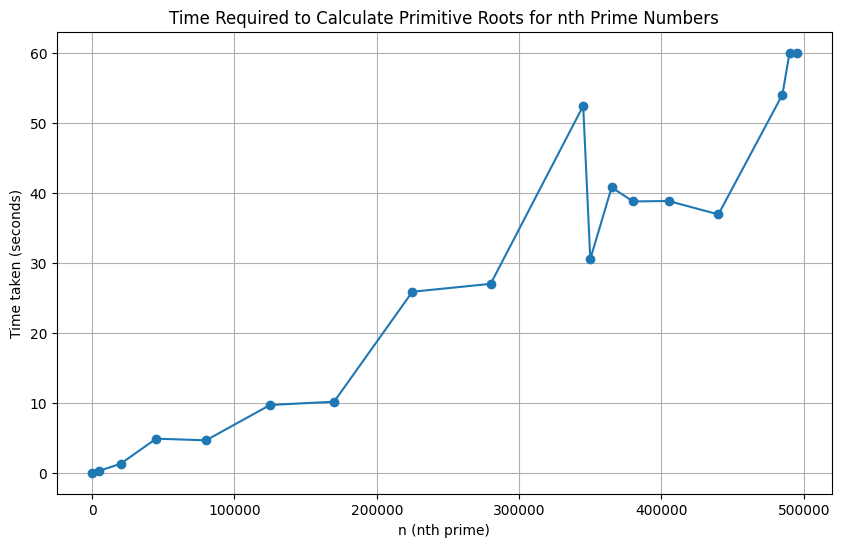

Enter a number to check if it is prime, type 'benchmark' to run the benchmark, or 'exit' to quit:


In [ ]:
while True:
    print("Enter a number to check if it is prime, type 'benchmark' to run the benchmark, or 'exit' to quit:")
    user_input = input().strip().lower()

    if user_input == 'exit':
        print("Exiting the program.")
        break

    if user_input == 'benchmark':
        # Benchmarking nth Primes for Primitive Roots
        benchmark_data = []
        slow_progress_threshold = 5  # Time difference threshold to detect slow progress
        previous_time = 0  # Store the time of the previous iteration
        step = 5000  # Initial step size

        print("Starting benchmarking...")
        n = 1
        bench_start_time = time.time()
        while n<500001:
            try:
                p = prime(n)  # Get the nth prime number
                factors = prime_factors(p - 1)
                num_roots = totient(p - 1)

                start_time = time.time()
                try:
                    find_primitive_roots(p, factors, num_roots)
                    time_taken = time.time() - start_time
                    benchmark_data.append((n, p, time_taken))
                    print(f"Prime {p} (n={n}): Time taken = {time_taken:.6f} seconds")

                    # Check for slow progress based on time difference
                    if previous_time and (time_taken - previous_time) < slow_progress_threshold:
                      step = step + 10000
                      print(f"Progress slow, increasing step size to {step}")
                    # Lower the step size if the time exceeds 45 seconds
                    elif time_taken > 45:
                      step = 5000
                      print(f"Computation time exceeds 45 seconds, lowering step size to {step}")


                    previous_time = time_taken  # Update previous time
                except TimeoutError:
                    benchmark_data.append((n, p, 60))  # Mark timeout as 60 seconds
                    print(f"Prime {p} (n={n}): Timeout")

            except Exception as e:
                print(f"Error processing n={n}: {e}")
            n = n + step
        bench_end_time = time.time()
        print(f"Benchmark completed in {bench_end_time - bench_start_time:.2f} seconds.")
        # Plotting Results
        if benchmark_data:
            n_values, primes, times = zip(*benchmark_data)
            plt.figure(figsize=(10, 6))
            plt.plot(n_values, times, marker='o')
            plt.xlabel("n (nth prime)")
            plt.ylabel("Time taken (seconds)")
            plt.title("Time Required to Calculate Primitive Roots for nth Prime Numbers")
            plt.grid()
            plt.show()
        continue


    if not user_input.isdigit():
        print("Invalid input. Please enter a valid number, type 'benchmark', or type 'exit' to quit.")
        continue

    p = int(user_input)

    if p == 2:
        print("2 is a prime number and has no primitive roots.")
        continue

    if not check_prime(p):
        print(f"{p} is not a prime number. Please enter a prime number.")
        continue

    # Display the primitive roots and their count for the given prime number.

    try:
        factors = prime_factors(p - 1)
        num_roots = totient(p - 1)  # Use SymPy's totient function
        print(f"Number of primitive roots for {p}: {num_roots}")

        start_time = time.time()
        roots = find_primitive_roots(p, factors, num_roots)
        end_time = time.time()

        time_taken = end_time - start_time

        if roots:
          print(f"Primitive roots of {p} (first 10 roots): {roots[:10]} {'...' if len(roots) > 10 else ''}")
          if len(roots) > 10:
            while True:
              print("Do you want to display all the roots? (yes/y to display, no/n to skip):")
              show_all = input().strip().lower()
              if show_all in ['yes', 'y']:
                print(f"All primitive roots of {p}: {roots}")
                break
              elif show_all in ['no', 'n']:
                break
              else:
                print("Invalid input. Please type 'yes/y' to display or 'no/n' to skip.")
          while True:
            print("Do you want to visualize the primitive roots? (yes/y to visualize, no/n to skip):")
            visualize = input().strip().lower()
            if visualize in ['yes', 'y']:
                if len(roots) > 1000:
                  print("The number of roots is large. Choose visualization type:")
                  print("1: Aggregated (bins)")
                  print("2: Sampled (random subset)")
                  print("3: Line Plot")
                  print("4: Interactive Plot")
                  choice = input("Enter your choice: ").strip()
                  if choice == '1':
                    plot_primitive_roots_aggregated(p, roots)
                  elif choice == '2':
                    plot_primitive_roots_sampled(p, roots)
                  elif choice == '3':
                    plot_primitive_roots_line(p, roots)
                  elif choice == '4':
                    plot_primitive_roots_interactive(p, roots)
                  else:
                    print("Invalid choice. Skipping visualization.")
                else:
                  plot_primitive_roots(p, roots)  # Use the default bar plot for smaller datasets
                break
            elif visualize in ['no', 'n']:
              break
            else:
              print("Invalid input. Please type 'yes/y' to visualize or 'no/n' to skip.")

        else:
            print(f"No primitive roots found for {p}.")

        print(f"Time taken: {time_taken:.6f} seconds")
    except TimeoutError as e:
        print(e)
